In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
input_data = np.load('input_total.npy')
output_data = np.load('output_total.npy')
input_data = np.transpose(input_data)
output_data = np.mean(output_data, axis = 1)

print(input_data.shape, output_data.shape)
output_data[0]

(155, 100000) (100000,)


24.975

In [39]:
df = pd.DataFrame()
input_features = ['strike', 'put', 'call', 'E', 'A', 'open', 'high', 'low', 'close', 'stock_volume', 'bid', 'ask', 'option_volume', 'open_interest', 'delta', 'gamma', 'theta', 'vega', 'implied_volatility', 'period']
for (index, feature) in enumerate(input_features):
    df[feature] = input_data[index][::2]
df.tail()

,strike,put,call,E,A,open,high,low,close,stock_volume,bid,ask,option_volume,open_interest,delta,gamma,theta,vega,implied_volatility,period
49995,68.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,9.1,10.6,0.0,0.0,0.9141,0.0203,-3.2406,5.4095,0.2239,73.0
49996,69.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,8.3,9.7,0.0,0.0,0.8984,0.0241,-3.4887,6.1238,0.2139,73.0
49997,70.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,7.2,8.7,0.0,0.0,0.8789,0.0286,-3.7647,6.9471,0.2044,73.0
49998,71.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,6.4,7.8,0.0,0.0,0.8545,0.0339,-4.0642,7.8805,0.1954,73.0
49999,72.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,5.5,6.8,0.0,0.0,0.8244,0.0400,-4.3741,8.9099,0.1868,73.0


In [50]:
stock_value = ['open', 'high', 'low', 'close']
for i in range(5, 9):
    t = input_data[i][::2] - input_data[0][::2]
    df[stock_value[i - 5] + "-strike"] = [max(0, x) for x in t]
df.tail()

,strike,put,call,E,A,open,high,low,close,stock_volume,...,gamma,theta,vega,implied_volatility,period,open-strike,high-strike,low-strike,close-strike,output
49995,68.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,...,0.0203,-3.2406,5.4095,0.2239,73.0,9.550003,9.830002,9.019997,9.489998,11.00
49996,69.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,...,0.0241,-3.4887,6.1238,0.2139,73.0,8.550003,8.830002,8.019997,8.489998,10.05
49997,70.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,...,0.0286,-3.7647,6.9471,0.2044,73.0,7.550003,7.830002,7.019997,7.489998,9.05
49998,71.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,...,0.0339,-4.0642,7.8805,0.1954,73.0,6.550003,6.830002,6.019997,6.489998,8.05
49999,72.0,0.0,1.0,0.0,1.0,77.550003,77.830002,77.019997,77.489998,208800.0,...,0.0400,-4.3741,8.9099,0.1868,73.0,5.550003,5.830002,5.019997,5.489998,7.20


In [51]:
df['output'] = output_data[::2]
df.head(50)

,strike,put,call,E,A,open,high,low,close,stock_volume,...,gamma,theta,vega,implied_volatility,period,open-strike,high-strike,low-strike,close-strike,output
0,18.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0545,0.0000,0.2827,17.0,24.169999,24.169999,23.150001,23.879999,24.975
1,19.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0575,0.0000,0.2827,17.0,23.169999,23.169999,22.150001,22.879999,24.025
2,20.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0606,0.0000,0.2827,17.0,22.169999,22.169999,21.150001,21.879999,22.650
3,21.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0636,0.0000,0.2827,17.0,21.169999,21.169999,20.150001,20.879999,22.000
4,22.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0667,0.0000,0.2827,17.0,20.169999,20.169999,19.150001,19.879999,20.925
5,23.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0696,0.0000,0.2827,17.0,19.169999,19.169999,18.150001,18.879999,20.000
6,24.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0727,0.0000,0.2827,17.0,18.169999,18.169999,17.150001,17.879999,18.925
7,25.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0757,0.0000,0.2827,17.0,17.169999,17.169999,16.150001,16.879999,18.000
8,26.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0788,0.0000,0.2827,17.0,16.169999,16.169999,15.150001,15.879999,16.925
9,27.0,0.0,1.0,0.0,1.0,42.169999,42.169999,41.150001,41.879999,8790200.0,...,0.0000,-0.0817,0.0000,0.2827,17.0,15.169999,15.169999,14.150001,14.879999,15.950


In [52]:
correlation_matrix = df.corr()
correlation_with_output = correlation_matrix.iloc[:-1, -1]
sorted_features = correlation_with_output.abs().sort_values(ascending=False)
print(sorted_features.index.tolist())
print(sorted_features)

['ask', 'bid', 'strike', 'vega', 'high', 'close', 'open', 'low', 'stock_volume', 'open-strike', 'high-strike', 'close-strike', 'low-strike', 'A', 'E', 'theta', 'period', 'delta', 'gamma', 'call', 'put', 'implied_volatility', 'open_interest', 'option_volume']
ask                   0.990958
bid                   0.990660
strike                0.483842
vega                  0.479078
high                  0.467546
close                 0.467287
open                  0.465729
low                   0.465335
stock_volume          0.426614
open-strike           0.264135
high-strike           0.260224
close-strike          0.255389
low-strike            0.254087
A                     0.235510
E                     0.235510
theta                 0.162985
period                0.151716
delta                 0.091066
gamma                 0.084297
call                  0.070665
put                   0.070665
implied_volatility    0.045729
open_interest         0.022221
option_volume         0.0151

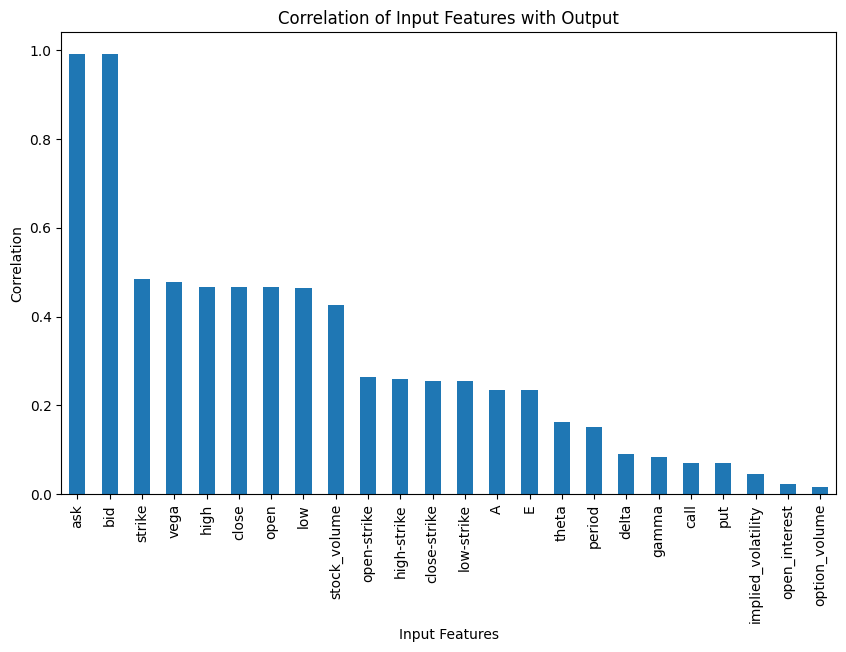

In [53]:
plt.figure(figsize=(10, 6))
sorted_features.plot(kind="bar")
plt.title("Correlation of Input Features with Output")
plt.xlabel("Input Features")
plt.ylabel("Correlation")
plt.show()